In [7]:
# read parquet data from HuggingFace

from pathlib import Path

import pandas as pd


def read_parquet_data():
    data = pd.DataFrame()
    paths = Path("data").rglob("*.parquet")
    for path in paths:
        temp_data = pd.read_parquet(path, engine="pyarrow")
        data = pd.concat([data, temp_data])

    data.to_csv("data/combined_data.csv", index=False)
    return data

,term,mnemonic
0,dearth,Earth is big. De-Earth (read as dearth) signif...
1,palliate,"""Pale + ate"" can represent reducing or eating ..."
2,semblance,"Semblance sounds like resemblance, which shoul..."
3,brook,Relate this to BROOK BOND tea. Just drink the ...
4,rebuke,"Rebuke sounds like ""Reebok"". Imagine scolding ..."
...,...,...
84,pied,"Recall a ""pie chart"" with various colors, illu..."
85,presentiment,"""Sentiment"" pertains to feeling or perceiving...."
86,garner,"Garner sounds like ""gardener."" A gardener gath..."
87,effete,Break it down to ef + feet. After a long walk ...


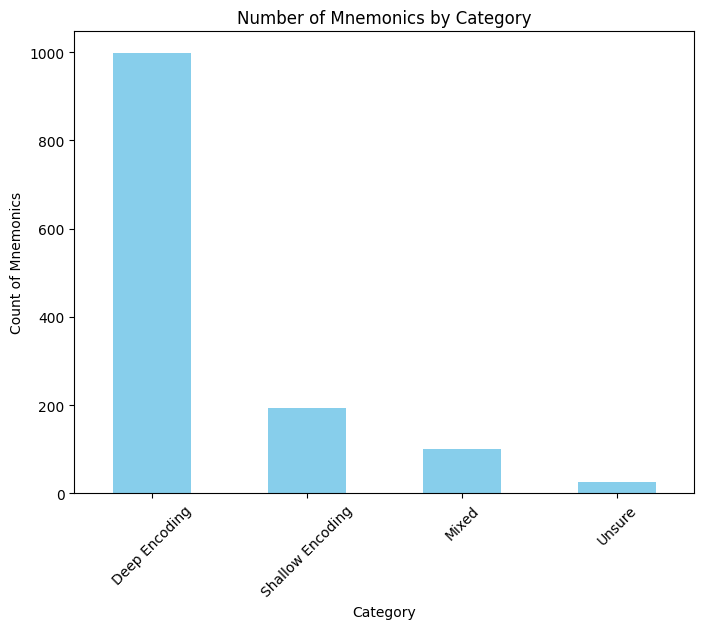

In [2]:
import matplotlib.pyplot as plt


def visualize_mnemonic_categories(dataset_path):
    """Visualizes the number of mnemonics by category from a specified dataset.

    Parameters:
    - dataset_path (str): Path to the CSV file containing the dataset with columns 'term', 'mnemonic', and 'category'.

    """
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Map category codes to readable labels
    category_labels = {
        1: "Deep Encoding",
        0: "Shallow Encoding",
        2: "Mixed",
        -1: "Unsure",
    }
    df["Category Label"] = df["category"].map(category_labels)

    # Count the occurrences of each category
    category_counts = df["Category Label"].value_counts()

    # Plot the counts
    plt.figure(figsize=(8, 6))
    category_counts.plot(kind="bar", color="skyblue")
    plt.title("Number of Mnemonics by Category")
    plt.xlabel("Category")
    plt.ylabel("Count of Mnemonics")
    plt.xticks(rotation=45)
    plt.show()


# Example usage
visualize_mnemonic_categories("../data/processed/classified.csv")